In [6]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import sys
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Activation,LeakyReLU,ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16

**Import Datasets path**

In [7]:
from glob import glob
glob('/content/drive/MyDrive/cnn/Dog_cat_Dataset/training_set/*')

['/content/drive/MyDrive/cnn/Dog_cat_Dataset/training_set/dogs',
 '/content/drive/MyDrive/cnn/Dog_cat_Dataset/training_set/cats']

In [8]:
from glob import glob
glob('/content/drive/MyDrive/cnn/Dog_cat_Dataset/test_set/*')

['/content/drive/MyDrive/cnn/Dog_cat_Dataset/test_set/cats',
 '/content/drive/MyDrive/cnn/Dog_cat_Dataset/test_set/dogs']

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

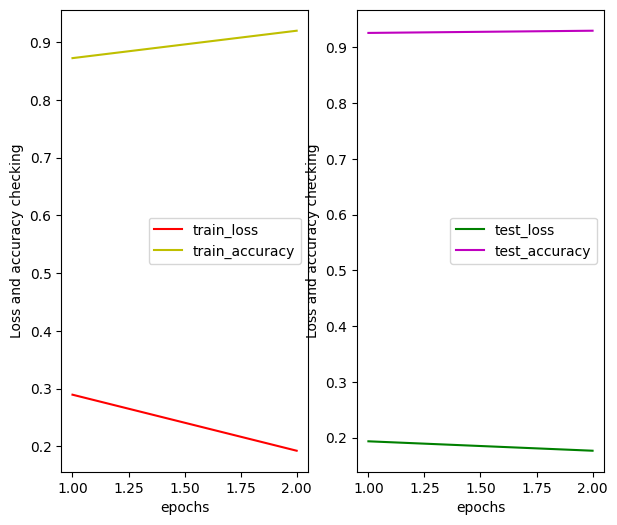

original image:(389, 287, 3)
After assign size for image:(250, 250, 3)
1/1 [==============================] - 1s 866ms/step
Its is a Cat


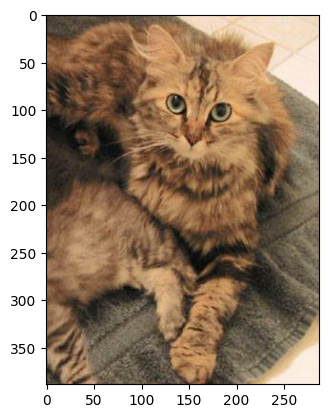

In [10]:
class VGG16_Binary:
  def __init__(self):
    self.Train_data_path='/content/drive/MyDrive/cnn/Dog_cat_Dataset/training_set' # take the path for train and test
    self.Test_data_path='/content/drive/MyDrive/cnn/Dog_cat_Dataset/test_set'
    self.height,self.width = 250,250 # set the size for model
    self.labels=['cats','dogs']

  def Binary_prediction(self,model):
    try:
      image_1=plt.imread('/content/drive/MyDrive/cnn/Dog_cat_Dataset/training_set/cats/cat.365.jpg')
      plt.imshow(image_1)
      print(f'original image:{image_1.shape}')
      # Take the size with same training data
      image_1=cv2.resize(image_1, (self.height,self.width))
      print("After assign size for image:{}".format(image_1.shape))
      image_1=np.array(image_1)/255.0
      image_1=np.expand_dims(image_1,axis=0)
      result=model.predict(image_1)
      if result[0][0]>0.5:
        print("Its is a Dog")
      else:
        print("Its is a Cat")

    except:
      print(f'error in main:',sys.exc_info())


  def Binary_EDAvalidation(self,model):
    try:
      train_accuracy = model.history.history['accuracy']
      train_loss = model.history.history['loss']
      test_accuracy = model.history.history['val_accuracy']
      test_loss = model.history.history['val_loss']
      plt.figure(figsize=(7,6))
      plt.subplot(1,2,1)
      plt.plot(np.arange(1,3),train_loss,color='r',label='train_loss')
      plt.plot(np.arange(1,3),train_accuracy,color='y',label='train_accuracy')
      plt.legend(loc='best')
      plt.xlabel("epochs")
      plt.ylabel('Loss and accuracy checking')
      plt.subplot(1,2,2)
      plt.plot(np.arange(1,3),test_loss,color='g',label='test_loss')
      plt.plot(np.arange(1,3),test_accuracy,color='m',label='test_accuracy')
      plt.xlabel("epochs")
      plt.ylabel('Loss and accuracy checking')
      plt.legend(loc='best')
      plt.show()
      return model

    except:
      print(f'error in main:',sys.exc_info())


  def Binary_architecture(self,Train_data_preprocess,Test_data_preprocess):
    try:
      """                   VGG16 Architecture                     """
      vgg16=VGG16(input_shape=(self.height,self.width,3),weights='imagenet',include_top=False) # give our image to vgg16
      for layers in vgg16.layers:
        layers.trainable=False
      x = Flatten()(vgg16.output) # 1d arry
      predict=Dense(1,activation='sigmoid')(x)  # binary classes
      model=Model(inputs=vgg16.inputs,outputs=predict)
      print(model.summary())
      Train_data=Train_data_preprocess.flow_from_directory(self.Train_data_path,target_size= (self.height,self.width),classes=self.labels,class_mode='binary',batch_size=32)
      Test_data=Test_data_preprocess.flow_from_directory(self.Test_data_path,target_size=(self.height,self.width),classes=self.labels,class_mode='binary',batch_size=32)
      model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
      model.fit(Train_data,validation_data=Test_data,epochs=2,steps_per_epoch=len(Train_data))
      return model

    except:
      print(f'error in main:',sys.exc_info())

  def Binary_preprocess(self):
    try:
      Train_data_preprocess = ImageDataGenerator(rescale=1./255.0,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
      Test_data_preprocess = ImageDataGenerator(rescale=1./255.0)
      model=self.Binary_architecture(Train_data_preprocess,Test_data_preprocess)
      self.Binary_EDAvalidation(model)
      self.Binary_prediction(model)

    except:
      print(f'error in main:',sys.exc_info())

if __name__=='__main__':
  try:
    obj=VGG16_Binary()
    obj.Binary_preprocess()

  except:
    print(f'error in main:',sys.exc_info())


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
